In [3]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'1000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '175f95c6-0364-44b2-8a77-cfebd5ca539c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

#Run in anaconda promt and reopen the notebook to change the bit rate for the code to work
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10

{'status': {'timestamp': '2024-12-28T03:53:58.897Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 5, 'notice': None, 'total_count': 10478}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11853, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [5]:
type(data)

dict

In [7]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [9]:
#Normalising the data making it more visually clear in the data frame

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11853,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.980216e+07,1.980216e+07,False,NaN,1,NaN,NaN,NaN,2024-12-28T03:53:00.000Z,9.447906e+04,5.007047e+10,8.9561,0.295544,-1.858711,-2.936381,-1.156289,33.289989,43.561948,1.870889e+12,56.8095,1.984060e+12,NaN,2024-12-28T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-28 14:24:10.773075
1,1027,Ethereum,ETH,ethereum,9743,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.204665e+08,1.204665e+08,True,NaN,2,NaN,NaN,NaN,2024-12-28T03:53:00.000Z,3.341138e+03,2.296675e+10,1.2456,0.484734,-1.019705,-3.569567,-7.318604,28.249308,24.866856,4.024953e+11,12.2204,4.024953e+11,NaN,2024-12-28T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-28 14:24:10.773075
2,825,Tether USDt,USDT,tether,110317,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.390051e+11,1.434401e+11,True,NaN,3,NaN,NaN,NaN,2024-12-28T03:53:00.000Z,9.984653e-01,1.054878e+11,3.5578,-0.020048,-0.025047,-0.119213,-0.236193,-0.067019,-0.159202,1.387917e+11,4.2148,1.432200e+11,NaN,2024-12-28T03:53:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-28 14:24:10.773075
3,52,XRP,XRP,xrp,1490,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.741023e+10,9.998674e+10,False,NaN,4,NaN,NaN,NaN,2024-12-28T03:53:00.000Z,2.150862e+00,5.022916e+09,-11.5524,0.471254,-1.208203,-5.622276,46.969972,311.514744,251.199511,1.234815e+11,3.7491,2.150862e+11,NaN,2024-12-28T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-28 14:24:10.773075
4,1839,BNB,BNB,bnb,2318,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.440073e+08,1.440073e+08,False,NaN,5,NaN,NaN,NaN,2024-12-28T03:53:00.000Z,6.958095e+02,1.835597e+09,46.0979,0.259458,1.021590,2.313696,6.805819,15.048268,15.924250,1.002016e+11,3.0426,1.002016e+11,NaN,2024-12-28T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-28 14:24:10.773075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,34422,Build On BNB,BOB,build-on-bnb,4,2024-12-05T09:32:49.000Z,"[memes, binance-alpha]",4.206900e+14,4.206900e+14,4.206900e+14,False,NaN,997,4.206900e+14,1.688600e+07,NaN,2024-12-28T03:53:00.000Z,4.013883e-08,4.643970e+05,-54.7747,0.277876,6.759861,6.368120,17.301245,17.301245,17.301245,1.688600e+07,0.0000,1.688600e+07,NaN,2024-12-28T03:53:00.000Z,1839.0,BNB Smart Chain (BEP20),BNB,bnb,0x51363F073b1E4920fdA7AA9E9d84BA97EdE1560e,2024-12-28 14:24:10.773075
996,3628,Moonchain,MXC,mxc,50,2018-12-06T00:00:00.000Z,"[distributed-computing, iot, substrate, depin]",NaN,2.664966e+09,2.664966e+09,False,NaN,996,2.642132e+09,1.676826e+07,NaN,2024-12-28T03:53:00.000Z,6.346488e-03,9.646721e+05,15.0555,18.236159,17.494171,7.469006,4.489690,6.249487,-12.681253,1.691317e+07,0.0005,1.691317e+07,NaN,2024-12-28T03:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-28 14:24:10.773075
997,28882,AIT Protocol,AIT,ait-protocol,33,2023-12-29T11:56:44.000Z,"[ai-big-data, web3, paal-ecosystem]",NaN,2.858279e+08,2.976048e+08,False,NaN,998,2.858164e+08,1.686522e+07,NaN,2024-12-28T03:53:00.000Z,5.900717e-02,5.448985e+05,-52.5596,1.048112,3.682381,-23.283824,-41.688735,-46.199031,-49.096335,1.686590e+07

In [11]:
def api_runner():

    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '175f95c6-0364-44b2-8a77-cfebd5ca539c',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    #Just putting the data into a pandas df instead of csv 
    #df2 = pd.json_normalize(data['data'])
    #df2['timestamp'] = pd.to_datetime('now')
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df, df_append]) 
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')

    if not os.path.isfile(r"C:\Users\lambu\Documents\Data Analytics Stuff\Python\Webscraping\Output Folder\API.csv"):
        df.to_csv(r"C:\Users\lambu\Documents\Data Analytics Stuff\Python\Webscraping\Output Folder\API.csv", header = 'column_names')
    else:
        df.to_csv(r"C:\Users\lambu\Documents\Data Analytics Stuff\Python\Webscraping\Output Folder\API.csv", mode='a', header = False)

In [57]:
#Running the function to append the data into csv
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(10)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [32]:
dfCSV = pd.read_csv(r"C:\Users\lambu\Documents\Data Analytics Stuff\Python\Webscraping\Output Folder\API.csv")
dfCSV

pd.set_option('display.max_rows', None)

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df3 = dfCSV.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [28]:
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.15856,-1.74984,-3.13084,-2.08008,34.98179,43.45280
Ethereum,-0.06490,-1.03804,-3.92914,-8.25098,28.94109,24.71218
Tether USDt,-0.00144,0.00377,-0.10496,-0.24874,-0.08859,-0.16877
XRP,0.08085,-1.17424,-5.73458,46.07263,313.63101,251.44878
BNB,0.31852,0.83255,1.49146,6.15746,15.48596,15.99172
Solana,0.49889,-2.11014,-5.08299,-23.85633,4.58599,17.79336
Dogecoin,0.41784,-0.13900,-3.23759,-22.81805,88.07449,144.09867
USDC,-0.00543,0.03084,0.00108,0.01347,0.00277,0.00688
Cardano,-0.18738,0.52917,-7.63113,-14.84358,152.34818,119.54594


In [42]:
df4 = df3.stack()
print(type(df4)) #Staking helps the data becomes more usable, however, it puts in into a series data type
df4

<class 'pandas.core.series.Series'>


name                                     
Bitcoin      quote.USD.percent_change_1h      0.15856
             quote.USD.percent_change_24h    -1.74984
             quote.USD.percent_change_7d     -3.13084
             quote.USD.percent_change_30d    -2.08008
             quote.USD.percent_change_60d    34.98179
             quote.USD.percent_change_90d    43.45280
Ethereum     quote.USD.percent_change_1h     -0.06490
             quote.USD.percent_change_24h    -1.03804
             quote.USD.percent_change_7d     -3.92914
             quote.USD.percent_change_30d    -8.25098
             quote.USD.percent_change_60d    28.94109
             quote.USD.percent_change_90d    24.71218
Tether USDt  quote.USD.percent_change_1h     -0.00144
             quote.USD.percent_change_24h     0.00377
             quote.USD.percent_change_7d     -0.10496
             quote.USD.percent_change_30d    -0.24874
             quote.USD.percent_change_60d    -0.08859
             quote.USD.percent_change_90

In [44]:
#Converting the series stack into a data frame

df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.15856
            quote.USD.percent_change_24h  -1.74984
            quote.USD.percent_change_7d   -3.13084
            quote.USD.percent_change_30d  -2.08008
            quote.USD.percent_change_60d  34.98179
            quote.USD.percent_change_90d  43.45280
Ethereum    quote.USD.percent_change_1h   -0.06490
            quote.USD.percent_change_24h  -1.03804
            quote.USD.percent_change_7d   -3.92914
            quote.USD.percent_change_30d  -8.25098
            quote.USD.percent_change_60d  28.94109
            quote.USD.percent_change_90d  24.71218
Tether USDt quote.USD.percent_change_1h   -0.00144
            quote.USD.percent_change_24h   0.00377
            quote.USD.percent_change_7d   -0.10496
            quote.USD.percent_change_30d  -0.24874
            quote.USD.percent_change_60d  -0.08859
            quote.USD.percent_change_90d  -0.16877
XRP         quote.USD.percent_change_1h    0.08085
            quote.USD.percent_change_24h  -1.17424
            quote.USD.percent_change_7d   -5.73458
            quote.USD.percent_change_30d  46.07263
            quote.USD.percent_change_60d 313.63101
            quote.USD.percent_change_90d 251.44878
BNB         quote.USD.percent_change_1h    0.31852
            quote.USD.percent_change_24h   0.83255
            quote.USD.percent_change_7d    1.49146
            quote.USD.percent_change_30d   6.15746
            quote.USD.percent_change_60d  15.48596
            quote.USD.percent_change_90d  15.99172
Solana      quote.USD.percent_change_1h    0.49889
            quote.USD.percent_change_24h  -2.11014
            quote.USD.percent_change_7d   -5.08299
            quote.USD.percent_change_30d -23.85633
            quote.USD.percent_change_60d   4.58599
            quote.USD.percent_change_90d  17.79336
Dogecoin    quote.USD.percent_change_1h    0.41784
            quote.USD.percent_change_24h  -0.13900
            quote.USD.percent_change_7d   -3.23759
            quote.USD.percent_change_30d -22.81805
            quote.USD.percent_change_60d  88.07449
            quote.USD.percent_change_90d 144.09867
USDC        quote.USD.percent_change_1h   -0.00543
            quote.USD.percent_change_24h   0.03084
            quote.USD.percent_change_7d    0.00108
            quote.USD.percent_change_30d   0.01347
            quote.USD.percent_change_60d   0.00277
            quote.USD.percent_change_90d   0.00688
Cardano     quote.USD.percent_change_1h   -0.18738
            quote.USD.percent_change_24h   0.52917
            quote.USD.percent_change_7d   -7.63113
            quote.USD.percent_change_30d -14.84358
            quote.USD.percent_change_60d 152.34818
            quote.USD.percent_change_90d 119.54594
TRON        quote.USD.percent_change_1h   -0.24944
            quote.USD.percent_change_24h   2.59710
            quote.USD.percent_change_7d    4.82449
            quote.USD.percent_change_30d  29.37999
            quote.USD.percent_change_60d  59.15449
            quote.USD.percent_change_90d  68.61335
Avalanche   quote.USD.percent_change_1h    0.12144
            quote.USD.percent_change_24h  -2.67119
            quote.USD.percent_change_7d   -8.23965
            quote.USD.percent_change_30d -17.01649
            quote.USD.percent_change_60d  39.22466
            quote.USD.percent_change_90d  25.58188
Toncoin     quote.USD.percent_change_1h   -0.14674
            quote.USD.percent_change_24h  -0.27542
            quote.USD.percent_change_7d    3.56524
            quote.USD.percent_change_30d -10.68829
            quote.USD.percent_change_60d  14.11123
            quote.USD.percent_change_90d  -1.41338
Chainlink   quote.USD.percent_change_1h   -0.01845
            quote.USD.percent_change_24h  -7.10594
            quote.USD.percent_change_7d   -8.34998
            quote.USD.percent_change_30d  16.22356
            quote.USD.percent_change_60d  91.02656
            quo

In [50]:
#Taking the name columns as non indexes
number_of_rows = df5.count()
index = pd.Index(range(int(number_of_rows)))

df6 = df5.reset_index()
df6

#FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  #index = pd.Index(range(int(number_of_rows)))

C:\Users\lambu\AppData\Local\Temp\ipykernel_17268\3840545287.py:3: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  index = pd.Index(range(int(number_of_rows)))


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.15856
1,Bitcoin,quote.USD.percent_change_24h,-1.74984
2,Bitcoin,quote.USD.percent_change_7d,-3.13084
3,Bitcoin,quote.USD.percent_change_30d,-2.08008
4,Bitcoin,quote.USD.percent_change_60d,34.98179
5,Bitcoin,quote.USD.percent_change_90d,43.45280
6,Ethereum,quote.USD.percent_change_1h,-0.06490
7,Ethereum,quote.USD.percent_change_24h,-1.03804
8,Ethereum,quote.USD.percent_change_7d,-3.92914
9,Ethereum,quote.USD.percent_change_30d,-8.25098


In [111]:
df7 = df6.rename(columns = {'level_1': 'percent_change'}) 
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.15856
1,Bitcoin,quote.USD.percent_change_24h,-1.74984
2,Bitcoin,quote.USD.percent_change_7d,-3.13084
3,Bitcoin,quote.USD.percent_change_30d,-2.08008
4,Bitcoin,quote.USD.percent_change_60d,34.98179
5,Bitcoin,quote.USD.percent_change_90d,43.45280
6,Ethereum,quote.USD.percent_change_1h,-0.06490
7,Ethereum,quote.USD.percent_change_24h,-1.03804
8,Ethereum,quote.USD.percent_change_7d,-3.92914
9,Ethereum,quote.USD.percent_change_30d,-8.25098


In [115]:
#Shortening the values in the percent change columns

    #It also can be done mannually for all of the values with example shown below
#df7['percent_change'].replace(['quote.USD.percent_change_1h'], ['1h'] )

df7['percent_change'] = df7['percent_change'].apply(lambda x: x.split('_')[-1])
df7
    

,name,percent_change,values
0,Bitcoin,1h,0.15856
1,Bitcoin,24h,-1.74984
2,Bitcoin,7d,-3.13084
3,Bitcoin,30d,-2.08008
4,Bitcoin,60d,34.98179
5,Bitcoin,90d,43.45280
6,Ethereum,1h,-0.06490
7,Ethereum,24h,-1.03804
8,Ethereum,7d,-3.92914
9,Ethereum,30d,-8.25098


<h2>Visualising Data</h2>

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

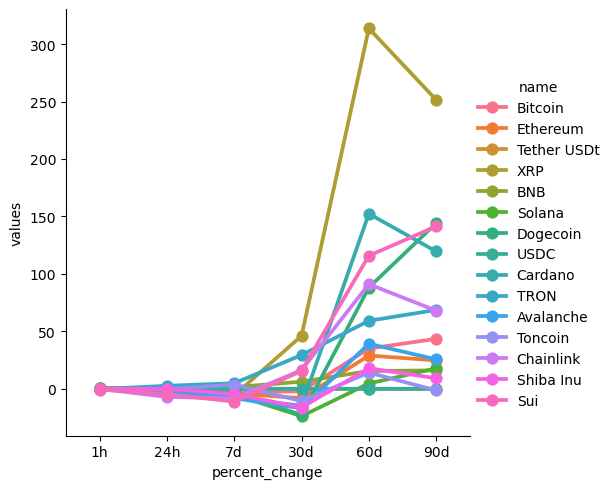

In [121]:
sns.catplot(x='percent_change', y='values', hue = 'name', data = df7, kind = 'point') 

In [143]:
df8 = dfCSV[['name', 'quote.USD.price', 'timestamp']]
df9 = df8.query("name == 'Bitcoin'")

df9['timestamp'] = pd.to_datetime(df9['timestamp'])
df9['timestamp'] = df9['timestamp'].dt.strftime('%H:%M:%S')

df9

C:\Users\lambu\AppData\Local\Temp\ipykernel_17268\1723026176.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['timestamp'] = pd.to_datetime(df9['timestamp'])
C:\Users\lambu\AppData\Local\Temp\ipykernel_17268\1723026176.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df9['timestamp'] = df9['timestamp'].dt.strftime('%H:%M:%S')


,name,quote.USD.price,timestamp
0,Bitcoin,94366.64329,12:17:10
15,Bitcoin,94366.64329,12:17:21
30,Bitcoin,94366.64329,12:17:32
45,Bitcoin,94366.64329,12:17:42
60,Bitcoin,94366.64329,12:17:53


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

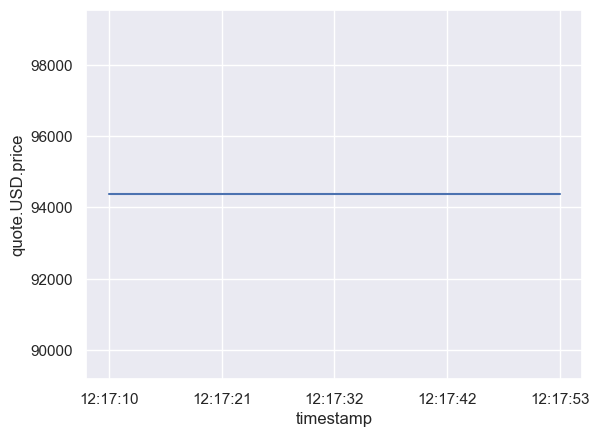

In [145]:

sns.set_theme(style='darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data=df9)